In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('Dataset/complete_dataset.csv')
# df2 = pd.read_csv('predictions3.csv')

In [71]:
df.shape

(275057, 14)

In [72]:
# df2.shape

In [73]:
df.drop(df.columns[0], axis=1, inplace=True)

In [74]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Hypthesis 1 : 
Null Hypothesis (H₀): There is no significant correlation between CreditScore and churn

Alternative Hypothesis (H₁):  There is a significant correlation between CreditScore and churn


In [75]:
outliers_idx = set()

In [76]:
# If a value lies outside of the normal distribution of the data, then it is classified as an outlier

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]
if outliers.size != 0:
    outliers_idx.update(outliers.index.tolist())
    print(f"No of outliers in Credit Score is {outliers.shape[0]}")

No of outliers in Credit Score is 429


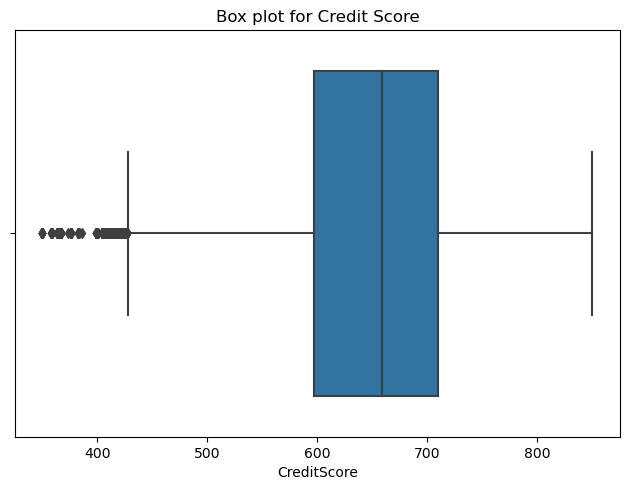

In [77]:
# Visualizing the outliers using boxplot
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(['CreditScore']):
    sns.boxplot(x=feature, data=df)
    # axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.title('Box plot for Credit Score')
# plt.savefig('./plots/outliers.png')
plt.show()

In [78]:
temp = df # Copying the original dataframe to a temporary dataframe

In [79]:
# Dropping the outlier index from the data
if outliers_idx:
    temp = temp.drop(outliers_idx)
    print(f"Dropped {len(outliers_idx)} outlier rows.")
else:
    print("No outliers found.")
df.reset_index(drop=True, inplace=True)

Dropped 429 outlier rows.


In [80]:
temp.shape

(274628, 13)

In [81]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274628 entries, 0 to 275056
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       274628 non-null  int64  
 1   Surname          274628 non-null  object 
 2   CreditScore      274628 non-null  int64  
 3   Geography        274628 non-null  object 
 4   Gender           274628 non-null  object 
 5   Age              274628 non-null  float64
 6   Tenure           274628 non-null  int64  
 7   Balance          274628 non-null  float64
 8   NumOfProducts    274628 non-null  int64  
 9   HasCrCard        274628 non-null  float64
 10  IsActiveMember   274628 non-null  float64
 11  EstimatedSalary  274628 non-null  float64
 12  Exited           274628 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 29.3+ MB


In [82]:
temp.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [83]:
temp['Exited'].unique()

array([0, 1], dtype=int64)

In [84]:
temp.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
from scipy.stats import t, pearsonr

In [86]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [96]:
r = np.corrcoef(temp['NumOfProducts'],temp['Exited'])[0, 1]
alpha = 0.05
n = df.shape[0]
t_value = r * np.sqrt((n - 2) / (1 - r**2))
degrees = n-2


critical_value = t.ppf(1 - alpha/2, degrees)

print(f"Correlation coefficient (r): {r}")
print(f"Calculated t-value: {t_value}")
print(f"Critical t-value at 1% significance level: {critical_value}")

if  (abs(t_value) > critical_value):
    print("Reject the null hypothesis: NumofProducts depends upon the credit score")
else:
    print("Fail to reject the null hypothesis: Doesn't depend on the credit score")

Correlation coefficient (r): -0.20901507724896107
Calculated t-value: -112.09530575086784
Critical t-value at 1% significance level: 1.9599726092932557
Reject the null hypothesis: NumofProducts depends upon the credit score


In [94]:
winds = temp['CreditScore']
pressure = temp['Exited']

correlation, p_value = pearsonr(winds, pressure)

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Pearson correlation: -0.031002837064663065
P-value: 2.2026379134760323e-59
Reject the null hypothesis: Significant correlation.


####  Hypthesis 2 : 
Null Hypothesis (H₀): Age follows a Poisson Distribution

Alternative Hypothesis (H₁): Age  does not follow a Poisson Distribution


In [98]:
from scipy.stats import poisson, chisquare
from scipy.stats import poisson,chi2

In [99]:
winds = df['Age']
mean_wind = winds.mean()
print("Lambda : ", mean_wind)
observed_freq = winds.value_counts().sort_index()
print("Observed Frequencies:\n", observed_freq)
print()

total = len(winds)
expected_freq = [poisson.pmf(k, mean_wind) * total for k in observed_freq.index]

expected_freq_series = pd.Series(expected_freq, index=observed_freq.index).fillna(0)

print("Expected Frequencies:\n", expected_freq_series)
print()
print("Sum of Observed Frequencies:", observed_freq.sum())
print("Sum of Expected Frequencies:", expected_freq_series.sum())

# Calculating chi-square statistic from scratch
chi_square_stat = np.sum((observed_freq - expected_freq_series) ** 2 / expected_freq_series)

print(f"Chi-square statistic (manual calculation): {chi_square_stat}")

# Degrees of freedom
degrees_of_freedom = len(winds.value_counts()) - 1
alpha = 0.10
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
print(f"Critical value at {alpha*100}% significance level: {critical_value}")  #change

# Calculating p-value using the chi-square distribution
p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)

print(f"P-value (manual calculation): {p_value}")
print()
if p_value < 0.10:
    print("Reject the null hypothesis: Winds do not follow a Poisson distribution.")
else:
    print("Fail to reject the null hypothesis: Winds follow a Poisson distribution.")


Lambda :  38.1244147940245
Observed Frequencies:
 18.0     220
19.0     363
20.0     588
21.0     947
22.0    1533
        ... 
83.0       5
84.0       8
85.0       5
88.0       1
92.0      16
Name: Age, Length: 74, dtype: int64

Expected Frequencies:
 18.0    3.447594e+01
19.0    6.917762e+01
20.0    1.318678e+02
21.0    2.393992e+02
22.0    4.148616e+02
            ...     
83.0    3.357063e-05
84.0    1.523644e-05
85.0    6.833885e-06
88.0    5.751443e-07
92.0    1.811873e-08
Length: 74, dtype: float64

Sum of Observed Frequencies: 275057
Sum of Expected Frequencies: 275028.5640431198
Chi-square statistic (manual calculation): inf
Critical value at 10.0% significance level: 88.84991577076495
P-value (manual calculation): 0.0

Reject the null hypothesis: Winds do not follow a Poisson distribution.


### Hypthesis 3 : 
Null Hypothesis (H₀): There is no difference in churn rates across geographical regions.

Alternative Hypothesis (H₁): Churn rates vary significantly across geographical regions.

In [93]:
from scipy.stats import chi2_contingency

# Create a contingency table
# Assuming 'Region' is the column for geographical regions and 'Exited' is the churn column
contingency_table = pd.crosstab(df['Geography'], df['Exited'], margins=True, margins_name="Total")

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])  # Exclude 'Total' row and column

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
print()
# Set significance level
alpha = 0.05

# Interpret the p-value
if p < alpha:
    print("Reject the null hypothesis: Churn rates vary significantly across geographical regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates across geographical regions.")


Contingency Table:
Exited          0      1   Total
Geography                       
France     134797  22589  157386
Germany     36969  20576   57545
Spain       51335   8791   60126
Total      223101  51956  275057

Chi-Square Test Results:
Chi2 Statistic: 13514.699278287726
p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[127657.08193574  29728.91806426]
 [ 46675.22384451  10869.77615549]
 [ 48768.69421974  11357.30578026]]

Reject the null hypothesis: Churn rates vary significantly across geographical regions.
